### Nos plantean el siguiente ejercicio: 
##### Escribe una función que calcule el valor futuro de una inversión con interés compuesto:
##### Retorno simple y logarítmico

##### Dada una lista de precios del SP500, calcula:

##### Retornos simples: 
$$
\frac {P_t-P_{t-1}}{P_t-1}
$$
##### Retornos logarítmicos: 
$$
ln(\frac {P_t}{P_{t-1}})
$$

##### Desde el año 2020 al 2025, y graficalos.

In [54]:
# Importamos librerias
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource

In [ ]:
# Descargamos los datos 
data = yf.download("^GSPC", start = '2020-01-01', end = '2025-09-30')

datos = data["Close"]


[*********************100%***********************]  1 of 1 completed


In [56]:
# Calculamos los retornos simples
diff = datos.diff()
ret_simples = datos.pct_change()
ret_log = np.log(datos / datos.shift(1))

print(ret_simples)
print (ret_log)

Ticker         ^GSPC
Date                
2020-01-02       NaN
2020-01-03 -0.007060
2020-01-06  0.003533
2020-01-07 -0.002803
2020-01-08  0.004902
...              ...
2025-09-15  0.004707
2025-09-16 -0.001288
2025-09-17 -0.000970
2025-09-18  0.004789
2025-09-19  0.004885

[1437 rows x 1 columns]
Ticker         ^GSPC
Date                
2020-01-02       NaN
2020-01-03 -0.007085
2020-01-06  0.003527
2020-01-07 -0.002807
2020-01-08  0.004890
...              ...
2025-09-15  0.004696
2025-09-16 -0.001289
2025-09-17 -0.000971
2025-09-18  0.004778
2025-09-19  0.004874

[1437 rows x 1 columns]


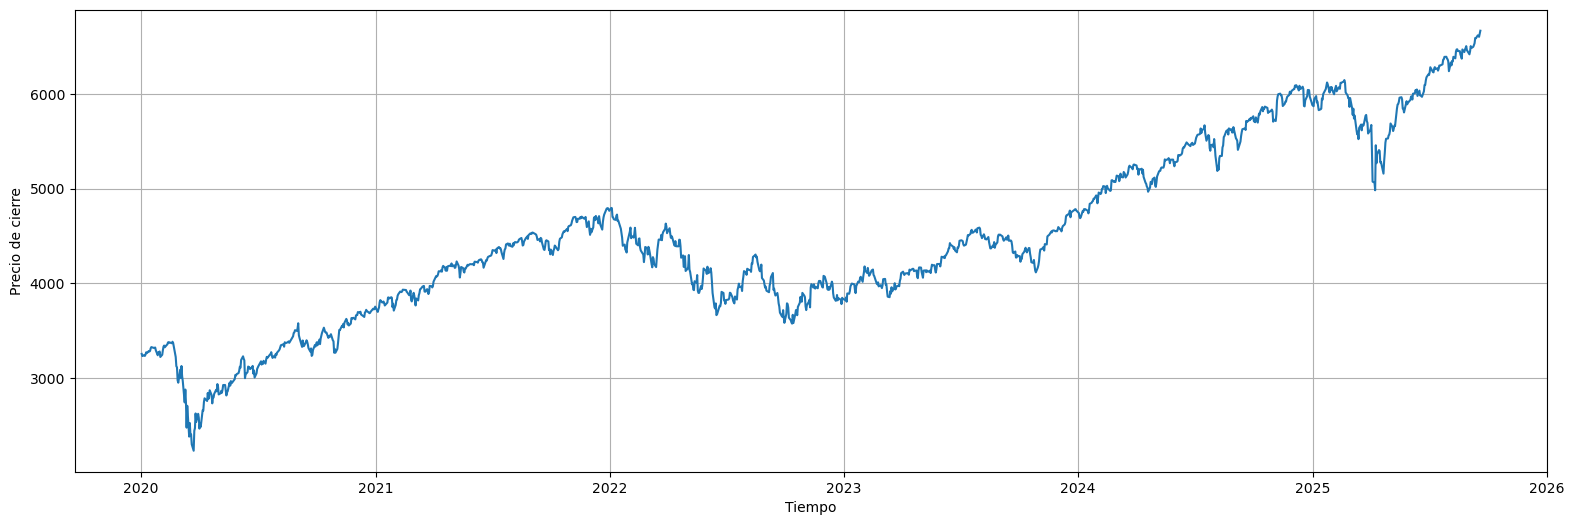

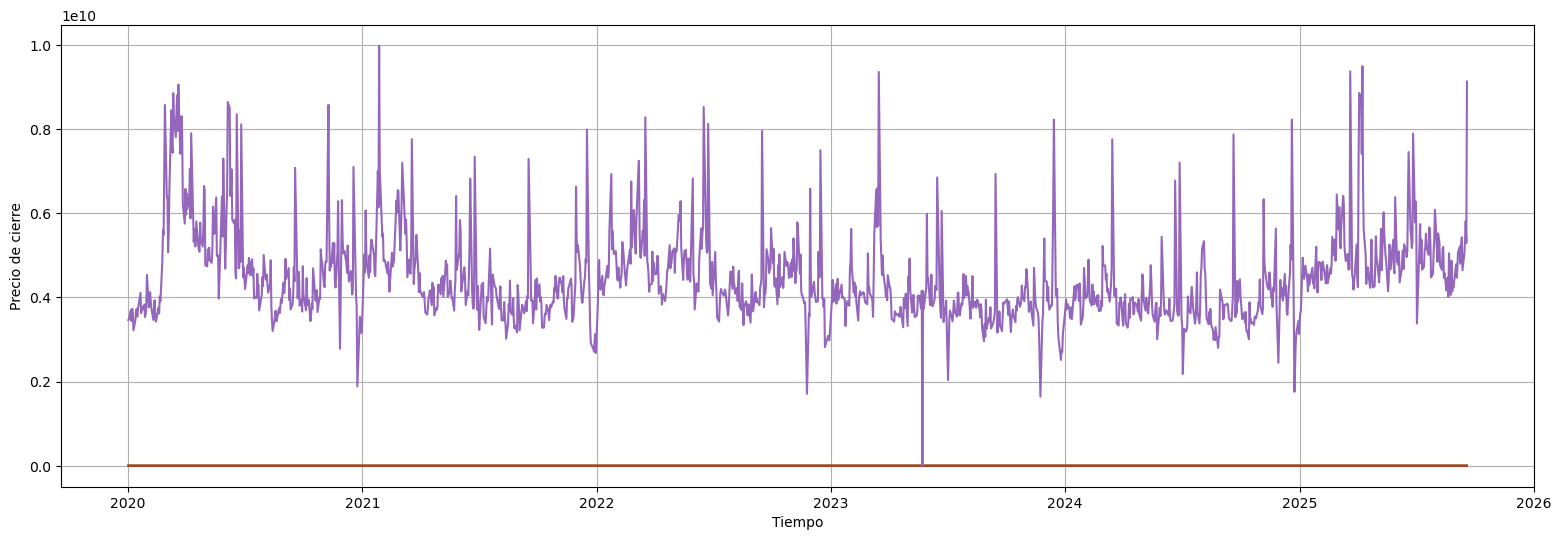

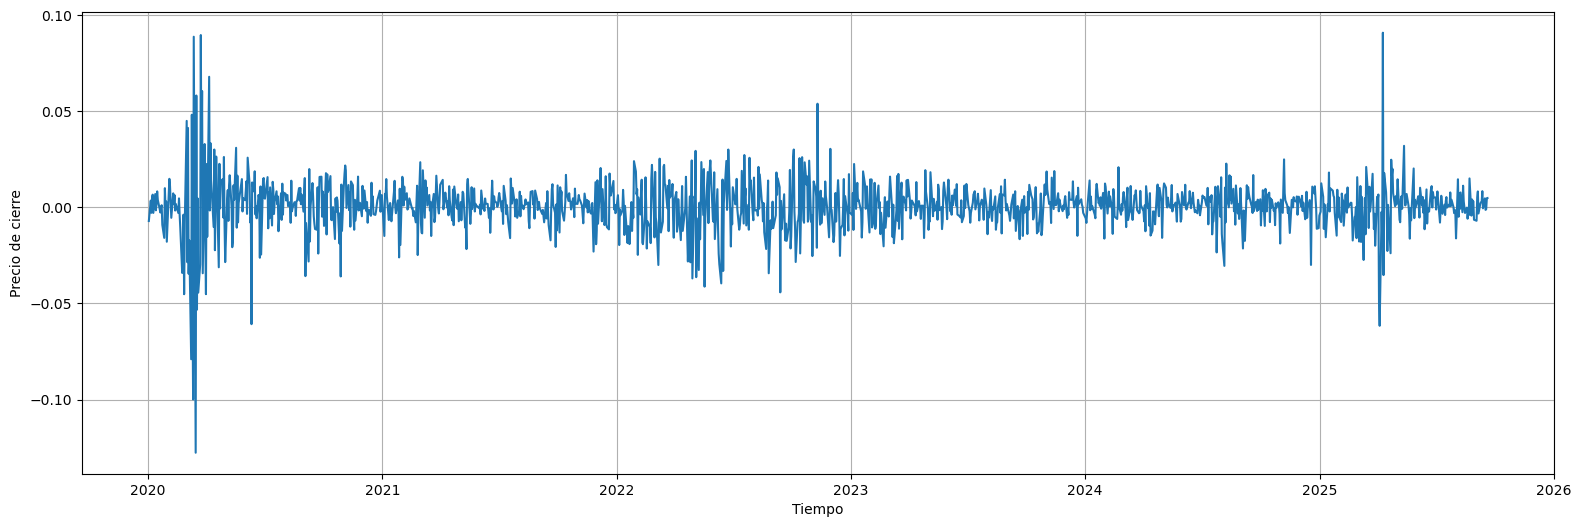

In [57]:
# Graficamos
plt.figure(figsize = (19,6))
plt.plot(datos)
plt.xlabel("Tiempo")
plt.ylabel("Precio de cierre")
plt.grid()
plt.show()

plt.figure(figsize = (19,6))
plt.plot(data)
plt.xlabel("Tiempo")
plt.ylabel("Precio de cierre")
plt.grid()
plt.show()

plt.figure(figsize = (19,6))
plt.plot(ret_log)
plt.xlabel("Tiempo")
plt.ylabel("Precio de cierre")
plt.grid()
plt.show()



In [ ]:
# Preparar fuente de datos para ver los datos históricos del activo financiero
source = ColumnDataSource(data=dict(
    x=datos.index,
    y=datos.values,
))

# Crear figura
p = figure(title="S&P 500 - Precio diario", x_axis_type="datetime", width=1200, height=600)
p.line("x", "y", source=source, line_width=2)
p.circle("x", "y", source=source, size=3)

# Añadir hover tool
hover = HoverTool(tooltips=[("Fecha", "@x{%F}"), ("Precio", "@y{0.00}")],
                  formatters={"@x": "datetime"})
p.add_tools(hover)

show(p)


# Preparar fuentes de datos para ver los datos históricos con sus retornos simples

source = ColumnDataSource(data=dict(
    x=ret_simples.index,
    y=ret_simples.values,
))


# Crear figura
p = figure(title="S&P 500 - Retornos Simples", x_axis_type="datetime", width=1200, height=600)
p.line("x", "y", source=source, line_width=2)
p.circle("x", "y", source=source, size=3)

# Añadir hover tool
hover = HoverTool(tooltips=[("Fecha", "@x{%F}"), ("Precio", "@y{0.00}")],
                  formatters={"@x": "datetime"})
p.add_tools(hover)

show(p)


# Preparar fuentes de datos para ver los datos históricos con sus retornos logaritmicos

source = ColumnDataSource(data=dict(
    x=ret_log.index,
    y=ret_log.values,
))

# Crear figura
p = figure(title="S&P 500 - Retornos Logarítmicos", x_axis_type="datetime", width=1200, height=600)
p.line("x", "y", source=source, line_width=2)
p.circle("x", "y", source=source, size=3)

# Añadir hover tool
hover = HoverTool(tooltips=[("Fecha", "@x{%F}"), ("Precio", "@y{0.00}")],
                  formatters={"@x": "datetime"})
p.add_tools(hover)

show(p)